In [78]:
import pandas as pd
import ipywidgets as wg
from IPython.display import display, clear_output, Image
from ipywidgets import *
import plotly.express as px
import re

In [11]:
df = pd.read_csv("analysis5.csv")

# Log

In [12]:
# print('Python: {}'.format(sys.version))
# print('pandas: {}'.format(pd.__version__))
# print('ipywidgets: {}'.format(wg.__version__))
# print('')
print('Dataframe loaded.') 

import sys
b = sys.getsizeof(df)

print('Processed ' + str(len(df)) + ' entries in table.')

import math
def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return "%s %s" % (s, size_name[i])

print('Mem cache: ' + str(convert_size(b)))

n = len(pd.unique(df['Project']))
print('Number of projects in dataframe: ' + str(n))

Dataframe loaded.
Processed 629 entries in table.
Mem cache: 237.76 KB
Number of projects in dataframe: 29


# Search Parameters

In [16]:
s=wg.Dropdown(options=['-- waiting for input --', 'Beds', 'TotalBldg_GSF'], description='Search by: ')
s1_opt = list(df['Cat_Major'].unique())
s1_opt.insert(0, '-- waiting for input --')
s1 = wg.Dropdown(options=s1_opt, description='Tab: ')
s2 = wg.SelectMultiple(
    rows=10,
    description='Department: ',
    disabled=False
)

def change_s1(*args):
    df_temp = df.loc[df['Cat_Major'] == s1.value]
    s2.options = df_temp['Cat_Minor'].unique()
    
s1.observe(change_s1, 'value')

display(s)
HBox([s1, s2])

Dropdown(description='Search by: ', options=('-- waiting for input --', 'Beds', 'TotalBldg_GSF'), value='-- wa…

In [93]:
s3 = wg.FloatText(
    max='10000',
    step='100',
    description='Query: '
)

s4 = wg.FloatLogSlider(
    value=10,
    base=10,
    min=0, # max exponent of base
    max=5, # min exponent of base
    step=1, # exponent step
    description='Deviation: ',
    readout=True,
    readout_format='d',
)

HBox([s3, s4])

In [171]:
out1 = wg.Output()
out2 = wg.Output()
out3 = wg.Output()
out4 = wg.Output()
out5 = wg.Output()
out6 = wg.Output()

def response(change):
    with out1:
        clear_output(wait=True)
        if s.value == 'Beds':
            xT = 'Number of Beds'
        else:
            xT = 'Area'

        df2 = df[s.value].value_counts()
        df2 = df2.to_frame()
        df3 = df2.reset_index()
        # df3['index'].iplot(kind="histogram", bins=20, title="Number of projects undertaken", xTitle=xT, yTitle='Count', theme='white', color='blue')
        figh = px.histogram(df3, x="index", nbins=20, template='none', marginal='rug', color_discrete_sequence=px.colors.sequential.RdBu,
                        labels={
                             "index": xT
                         },
                        title="Number of projects undertaken till date")
        figh.show()
             
    with out2:
        clear_output(wait=True)
        df_query = df.loc[(df[s.value] >= int(s3.value)-int(s4.value)) & (df[s.value] < int(s3.value)+int(s4.value))]
        df4 = df_query.loc[(df['Cat_Minor'].isin(s2.value)) | (df['Cat_Minor'] == s2.value)]
        # df4 = df.loc[df['Cat_Minor'].isin(s2.value) & df['Project'].isin(s3.value)]
        # If you also want to filter out projects, this shows mean now
        df5 = df4[['Cat_Minor', 'Total_SF']]
        df6 = df5.groupby(['Cat_Minor'], as_index=False).mean()
        df7 = df6.style.set_properties(**{'text-align': 'left'})
        figp = px.pie(df6, values='Total_SF', names='Cat_Minor', title='Area Allocation (Mean)', hole=.5, color_discrete_sequence=px.colors.sequential.Agsunset)
        figp.show()
    
    with out3:
        clear_output(wait=True)
        display(df7)
    
    with out4:
        clear_output(wait=True)
        print('Queried dataframe: ')
        df8 = df4[['Project', s.value]]
        df9 = df8.groupby(['Project'], as_index=False).mean()
        display(df9)
    
#     with out5:
#         clear_output(wait=True)
#         dfs = df[['Project', 'TotalBldg_GSF', 'Beds']]
#         @interact
#         def show_related_projects(x='Search here'):
#             return dfs.loc[(df['Project'].str.contains(x, flags=re.I, regex=True))].groupby(['Project'], as_index=False).mean()
    
    with out5:
        clear_output(wait=True)
#         qdf_list = list(dfs['Project'].unique())
#         qdf=wg.Combobox(options=qdf_list, description='Search by: ', ensure_option=True)
#         display(qdf)
        df_specific = df.loc[(df['Cat_Minor'].isin(s2.value)) | (df['Cat_Minor'] == s2.value)]
        df_specific2 = df_specific[['Cat_Minor', 'Total_SF', 'Project']]
        df_specific3 = df_specific2.groupby(['Project', 'Cat_Minor'], as_index=False).mean()
        @interact
        def plot_related_projects(x='search for'):
            fig = px.pie(df_specific3.loc[(df_specific3['Project'].str.contains(x, flags=re.I, regex=True))], values='Total_SF', names='Cat_Minor', title='Area Allocation: '+str(df_specific3.loc[(df_specific3['Project'].str.contains(x, flags=re.I, regex=True))]['Project'].unique()), hole=.5, color_discrete_sequence=px.colors.sequential.Purpor)
            fig.show()
            dfs = df[['Project', 'TotalBldg_GSF', 'Beds']]
            return dfs.loc[(df['Project'].str.contains(x, flags=re.I, regex=True))].groupby(['Project'], as_index=False).mean()
    
    with out6:
        clear_output(wait=True)
        import os
        from IPython.display import Image
        @interact
        def show_images(x=widgets.Combobox(options=tuple(os.listdir('img/')), value='40038.000_Sulaiman Al Rajhi_Daycare.jpg', continuous_update=False)):
            display(Image('img/'+x))
        
s.observe(response, names="value")
s2.observe(response, names="value")
s3.observe(response, names="value")
s4.observe(response, names="value")

# Result Dashboard

In [162]:
dashboard = wg.HBox([out2, out3, out4])
# query = wg.VBox([out5, out6])

accordion = wg.Accordion(children=[out1, dashboard])
accordion.set_title(0, 'KDE Plot')
accordion.set_title(1, 'Project Recommendation')
accordion

tab = wg.Tab()
tab.children = [accordion, out5, out6]
tab.set_title(0, 'Plots')
tab.set_title(1, 'Project Search')
tab.set_title(2, 'Reference Plans')
display(tab)


In [166]:
# def show_image(*args):
#     def f(x):
#         display(Image('img/'+x))
#     interact(f, x=list(df_path.loc[df_path['Path'].str.contains(a.value, flags=re.I, regex=True)]['Path'].unique()));

# a.observe(show_image, 'value')

NameError: name 'a' is not defined

In [165]:
# import re
# # search_img = wg.Combobox(
# #     placeholder='Choose Dept.',
# #     options=list(df['Cat_Minor'].unique()),
# #     description='Search:',
# #     ensure_option=False,
# #     disabled=False
# # )

# df_path = df[['Cat_Minor', 'Path']]
# df_path = df_path.dropna()

# # display(search_img)

# @interact
# def show_images(file=list(df_path.loc[df_path['Path'].str.contains(search_img.value, flags=re.I, regex=True)]['Path'].unique())):
#     display(Image('img/'+file))


Combobox(value='', description='Search:', options=('Interventional Radiology', 'Surgery', 'Endoscopy', 'Emerge…

Dropdown(options=(), value=None)

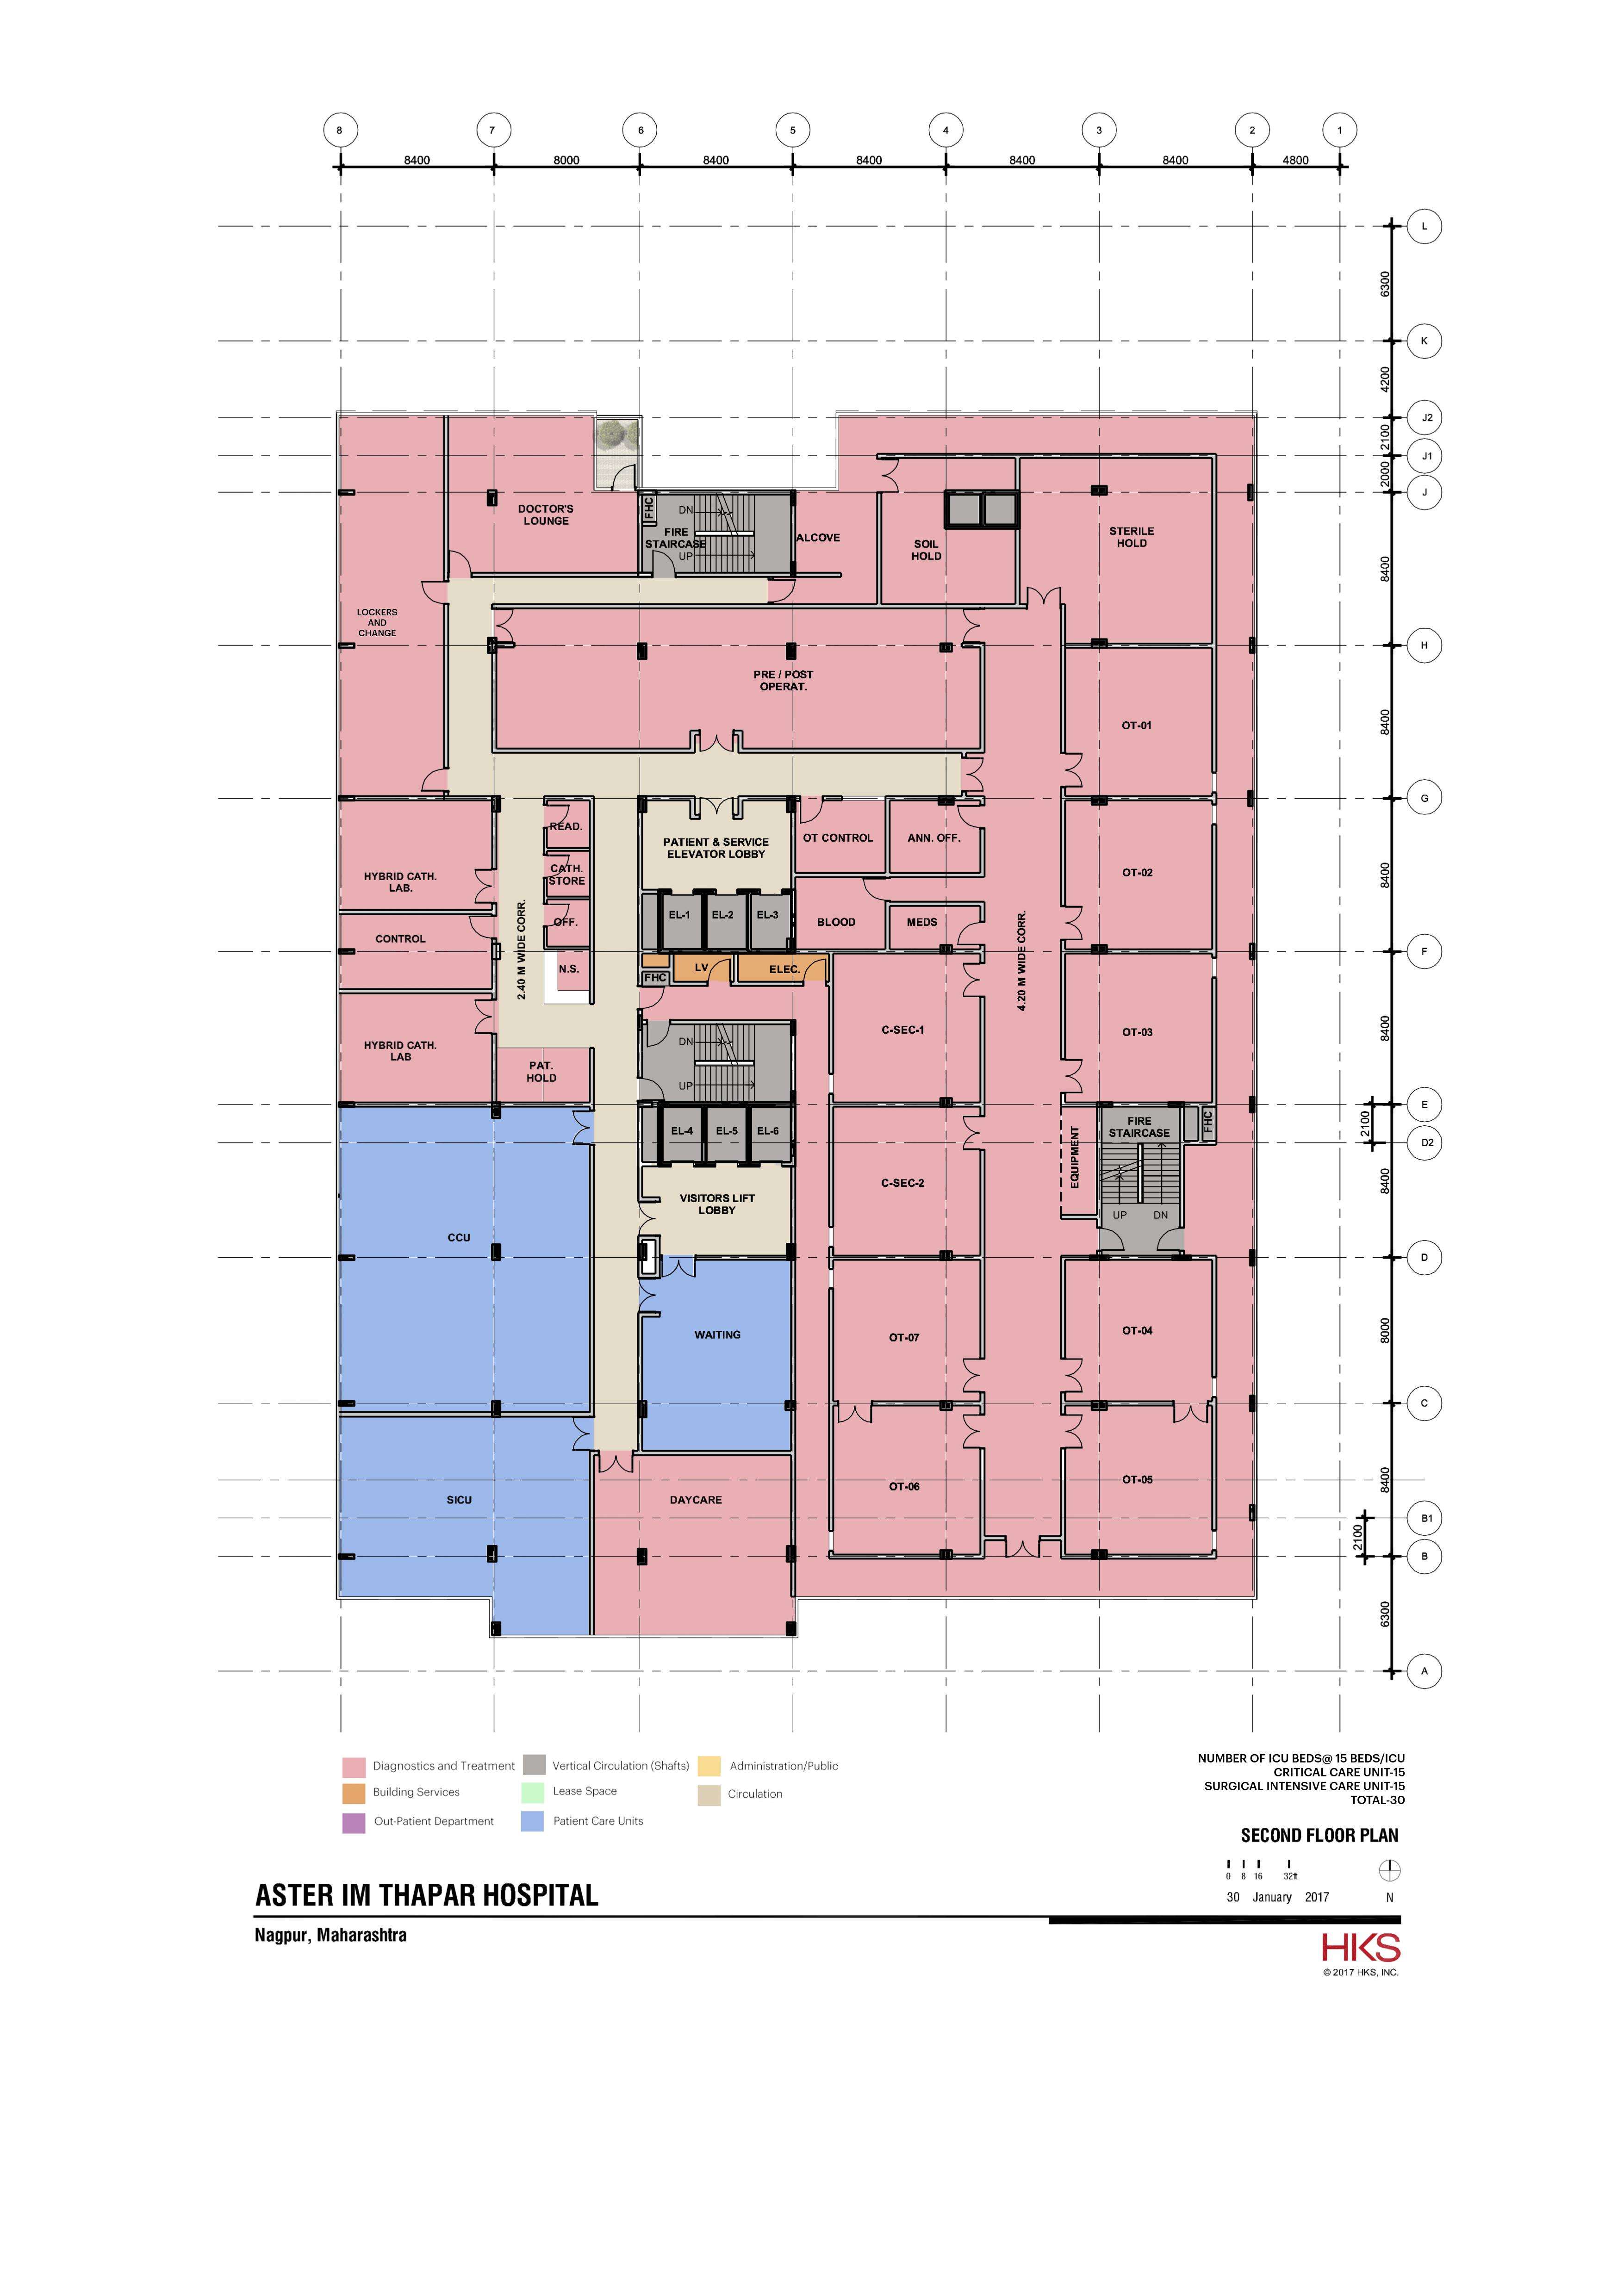

TypeError: can only concatenate str (not "NoneType") to str

In [167]:
# import re
# search_img = wg.Combobox(
#     placeholder='Choose Dept.',
#     options=list(df['Cat_Minor'].unique()),
#     description='Search:',
#     ensure_option=False,
#     disabled=False
# )

# df_path = df[['Cat_Minor', 'Path']]
# df_path = df_path.dropna()

# display(search_img)


# img_result = wg.Dropdown(options='')
# display(img_result)


# # Updates the image options based on directory value
# def update_images(*args):
#     df_imgq = df_path.loc[df_path['Path'].str.contains(search_img.value, flags=re.I, regex=True)]
#     img_result.options = list(df_imgq['Path'].unique())

# # Tie the image options to directory value
# search_img.observe(update_images, 'value')

# # Show image
# def show_image(*args):
#     display(Image(filename='img/' +img_result.value))
# img_result.observe(show_image, 'value')

In [ ]:
# Image(filename='img/' +img_result.value)

In [ ]:
# directory = wg.Dropdown(options=['img', 'nature', 'assorted'])
# images = wg.Dropdown(options=os.listdir(directory.value))
# display(directory)
# display(images)

# # from IPython.display import Image
# Image(filename=directory.value + '/' +images.value)

# Machine Learning

In [ ]:
import sklearn
# print('sklearn: {}'.format(sklearn.__version__))

In [ ]:
# df_t1 = df.loc[(df['Cat_Major'] == 'D&T') & (df['Cat_Minor'] == 'Surgery')]
# df_ml = df_t1[['Beds', 'TotalBldg_GSF', 'Total Net Area']].groupby(['Beds'], as_index=False).mean()
# df_ml = df_ml.dropna()

# df_ml.head()
fig = px.scatter(x=df['TotalBldg_GSF'], y=df['Beds'], template='none', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

df_ml = df[['Beds', 'TotalBldg_GSF']].groupby(['Beds'], as_index=False).mean()
df_ml = df_ml.dropna()

In [ ]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(["TotalBldg_GSF"], axis=1)
y = df_ml["TotalBldg_GSF"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

### K-nearest neighbor (KNN) model for regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(train_scaled, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_train, model.predict(train_scaled))
mae = mean_absolute_error(y_train, model.predict(train_scaled))
from math import sqrt
print("mse = ",mse," & mae = ",mae," & rmse = ", sqrt(mse))

In [ ]:
test_mse = mean_squared_error(y_test, model.predict(test_scaled))
test_mae = mean_absolute_error(y_test, model.predict(test_scaled))
print("mse = ",test_mse," & mae = ",test_mae," & rmse = ", sqrt(test_mse))

### Decision Trees & Random Forests

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
tree_model.fit(train_scaled, y_train)
rf_model.fit(train_scaled, y_train)

# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error

tree_mse = mean_squared_error(y_train, tree_model.predict(train_scaled))
tree_mae = mean_absolute_error(y_train, tree_model.predict(train_scaled))
rf_mse = mean_squared_error(y_train, rf_model.predict(train_scaled))
rf_mae = mean_absolute_error(y_train, rf_model.predict(train_scaled))

# from math import sqrt

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse))

tree_test_mse = mean_squared_error(y_test, tree_model.predict(test_scaled))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(test_scaled))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(test_scaled))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(test_scaled))

print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse))

### Neural Network: MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor
modelnn = MLPRegressor()
modelnn.fit(train_scaled, y_train)

In [136]:
# df_specific = df.loc[(df['Cat_Minor'].isin(s2.value)) | (df['Cat_Minor'] == s2.value)]
# df_specific2 = df_specific[['Cat_Minor', 'Total_SF', 'Project']]
# df_specific3 = df_specific2.groupby(['Project', 'Cat_Minor'], as_index=False).mean()
# str(df_specific3.loc[(df_specific3['Project'].str.contains('all', flags=re.I, regex=True))]['Project'].unique())

"['Allegheny']"

interactive(children=(Combobox(value='40038.000_Sulaiman Al Rajhi_Daycare.jpg', continuous_update=False, descr…

"['40038.000_Sulaiman Al Rajhi_ChemoDialysisRehabPhysio.jpg', '40038.000_Sulaiman Al Rajhi_Daycare.jpg', '40038.000_Sulaiman Al Rajhi_Emergency.jpg', '40038.000_Sulaiman Al Rajhi_Endoscopy.jpg', '40038.000_Sulaiman Al Rajhi_LabsAdmin.jpg', '40038.000_Sulaiman Al Rajhi_OPD.jpg', '40038.000_Sulaiman Al Rajhi_Radiology.jpg', '80066.000_KCTMultispeciality_AdminPCU.jpg', '80066.000_KCTMultispeciality_D&TandPCU.jpg', '80066.000_KCTMultispeciality_OPDandD&T.jpg', '80066.000_KCTMultispeciality_PCU.jpg']"